In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [12]:
# Load data
df = pd.read_csv('/content/marketing_AB.csv')
df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [16]:
# Delete the unnames colum
df = pd.read_csv('/content/marketing_AB.csv', usecols=[col for col in df.columns if not col.startswith('Unnamed')])
df

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23


The majority of the people will be exposed to ads (the experimental group). And a small portion of people (the control group) would instead see a Public Service Announcement (PSA) (or nothing) in the exact size and place the ad would normally be.

In [ ]:
# Data dictionary:

# user id: User ID (unique)
# test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
# converted: If a person bought the product then True, else is False
# total ads: Amount of ads seen by person
# most ads day: Day that the person saw the biggest amount of ads
# most ads hour: Hour of day that the person saw the biggest amount of ads

In [18]:
# Make sure that there are only unique value and no duplicated for user id
print(df.duplicated(subset = 'user id').sum())

# Check if there are missing values
print(df.isnull().sum())

0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64


In [19]:
# General info
print(df.info())
print(df.shape)
print(df.columns)

# Descriptive statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB
None
(588101, 6)
Index(['user id', 'test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')
            user id      total ads  most ads hour
count  5.881010e+05  588101.000000  588101.000000
mean   1.310692e+06      24.820876      14.469061
std    2.022260e+05      43.715181       4.834634
min    9.000000e+05       1.000000       0.000000
25%    1.143190e+06       4.000000      11.000000
50%    1.313725e+06      13.000000      

In [20]:
# We are now going to do an A/B test for the variable 'test group'.
# The goal was to increase the converted rate.
# The metric is the mean converted rate per group.

# Number of persons in the differents groups
print(df['test group'].value_counts())

# Conversiton rates for each group
conversion_rates = df.groupby('test group')['converted'].mean()
print(conversion_rates)

test group
ad     564577
psa     23524
Name: count, dtype: int64
test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


We can already see that the conversion rate is better for the group who saw the ad : 2.6% instead of 1.8% for groupe who saw the public service announcement.

Hypothesis:
H0: There is no significant difference in the conversion rate between the 2 groups.
H1: There is a difference.

In [21]:
# Contingency table
contingency_table = pd.crosstab(df['test group'], df['converted'])

# Chi2 test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 54.005823883685245, p-value: 1.9989623063390075e-13


Since the p-value is well below 0,05 (the threshold), we can reject H0 and conclude that there is a significant difference between the groups.

<ipython-input-30-7246dbe445c6>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['test group'] == 'ad']['converted'], label='Ad Group', shade=True)
<ipython-input-30-7246dbe445c6>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['test group'] == 'psa']['converted'], label='PSA Group', shade=True)


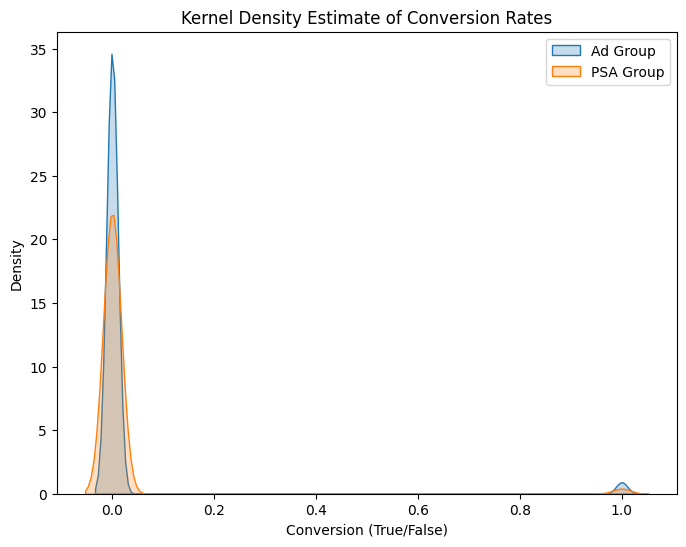

In [30]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['test group'] == 'ad']['converted'], label='Ad Group', shade=True)
sns.kdeplot(df[df['test group'] == 'psa']['converted'], label='PSA Group', shade=True)
plt.xlabel('Conversion')
plt.ylabel('Density')
plt.title('Conversion Rates')
plt.legend()
plt.show()